<a href="https://colab.research.google.com/github/secutron/TesTime/blob/main/test_simple_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F 

import math
import numpy as np 
import random

#import visdom

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

#vis = visdom.Visdom()

cpu


In [8]:
test = torch.rand((10, 32, 512))
print(test[0].shape)
print(test[0])
print(test[0][0][0])
print(test[0][0][1])
print(test[0][0][0])

torch.Size([32, 512])
tensor([[0.7375, 0.3450, 0.8279,  ..., 0.6848, 0.1344, 0.9631],
        [0.7574, 0.5396, 0.6970,  ..., 0.9857, 0.5977, 0.1941],
        [0.6836, 0.3459, 0.9136,  ..., 0.0622, 0.0353, 0.2817],
        ...,
        [0.3039, 0.0235, 0.1730,  ..., 0.3120, 0.5535, 0.0482],
        [0.1764, 0.2989, 0.9795,  ..., 0.5931, 0.3994, 0.7647],
        [0.8492, 0.1733, 0.2576,  ..., 0.6306, 0.0979, 0.0671]])
tensor(0.7375)
tensor(0.3450)
tensor(0.7375)


nn.Transfomer : https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html#transformer

디폴트값:

    d_model=512, 
    nhead=8, 
    num_encoder_layers=6, 
    num_decoder_layers=6, 
    dim_feedforward=2048, 
    dropout=0.1, 
    activation=<function relu>, 
    custom_encoder=None, 
    custom_decoder=None, 
    layer_norm_eps=1e-05, 
    batch_first=False, 
    norm_first=False, 
    device=None, 
    dtype=None

In [9]:
class Transformer(nn.Module):
    def __init__(self, num_tokens, dim_model, num_heads, num_encoder_layers, num_decoder_layers, dropout_p, ):
        super().__init__()

        # Layers
        self.transformer = nn.Transformer(
            d_model=dim_model,
            nhead=num_heads,
            num_encoder_layers=num_encoder_layers,
            num_decoder_layers=num_decoder_layers,
            dropout=dropout_p,
        )

    def forward(self):
        pass

# 포지셔널 인코딩

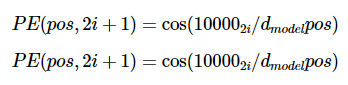


self.register_buffer("pos_encoding", pos_encoding)

- register_buffer로 layer를 등록하면 optimizer가 업데이트 하지 않는다.

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, dim_model, dropout_p, max_len):
        super().__init__()
        
        self.dropout = nn.Dropout(dropout_p)

        # Encoding - From formula
        pos_encoding = torch.zeros(max_len, dim_model)
        positions_list = torch.arange(0, max_len, dtype=torch.float).view(-1, 1) # 0, 1, 2, 3, 4, 5
        division_term = torch.exp(torch.arange(0, dim_model, 2).float() * (-math.log(10000.0)) / dim_model) # 1000^(2i/dim_model)

        pos_encoding[:, 0::2] = torch.sin(positions_list * division_term)
        pos_encoding[:, 1::2] = torch.cos(positions_list * division_term)

        # Saving buffer (same as parameter without gradients needed)
        pos_encoding = pos_encoding.unsqueeze(0).transpose(0, 1)
        self.register_buffer("pos_encoding", pos_encoding)

    def forward(self, token_embedding: torch.tensor) -> torch.tensor:
        # Residual connection + pos encoding
        return self.dropout(token_embedding + self.pos_encoding[:token_embedding.size(0), :])                      
                                    

In [ ]:
model = fxnnxc().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

EPOCH = 1
c = 0
for t in range(EPOCH): # EPOCH
    for i, (sample, target) in enumerate(train_loader): #BATCH
        sample = sample.to(device)
        target = target.to(device)
        y = model(sample)

        loss = criterion(y, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        vis.line(X=[c], Y=[loss.item()], win="loss",name="TransformerEncoder" , 
                    update='append',opts=dict(showlegend=True))
        c+=1

In [ ]:
# Test

correct = 0
total = 0
with torch.no_grad(): 
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(correct/total*100)

87.03999999999999
